In [11]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
df = pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
len(df)

119390

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# drop varible
the company variable seems not so informative

agent too.

let's drop it

In [12]:
df = df.drop(['company', 'agent'], axis=1)

In [34]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [20]:
df_gorup_by_year = df.is_canceled.groupby(df.arrival_date_year).mean()
df_gorup_by_year

arrival_date_year
2015    0.370158
2016    0.358633
2017    0.386979
Name: is_canceled, dtype: float64

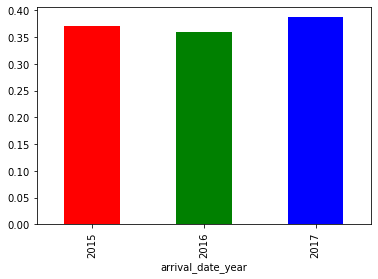

In [54]:
my_colors = 'rgbkymc'
df_gorup_by_year.plot.bar(color=list(my_colors))

In [56]:
df_gorup_by_month = df.is_canceled.groupby(df.arrival_date_month).mean()
df_gorup_by_year

arrival_date_year
2015    0.370158
2016    0.358633
2017    0.386979
Name: is_canceled, dtype: float64

June seems to be kind of bumpy

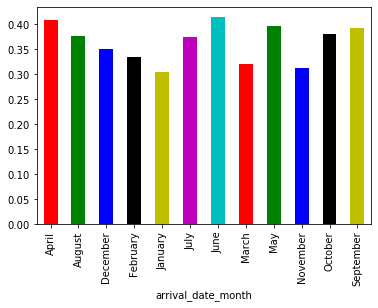

In [55]:
df_gorup_by_month.plot.bar(color=list(my_colors))

In [29]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

2 types of a hotel
now we will find the the more canceled hotel from two of them

In [32]:
df_gorup_by_type = df.is_canceled.groupby(df.hotel).mean()
df_gorup_by_type

hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: is_canceled, dtype: float64

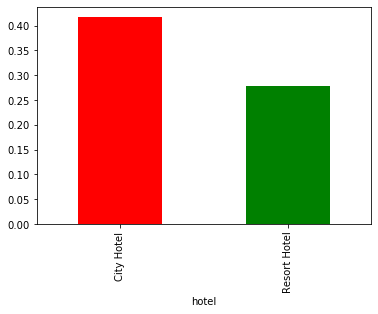

In [52]:
df_gorup_by_type.plot( kind='bar', color=list(my_colors))


holy shit more than 40% of City Hotel cancel

In [76]:
df_gorup_by_type_year = df.groupby(["hotel","arrival_date_year"])["is_canceled"].count()
df_gorup_by_type_year

hotel         arrival_date_year
City Hotel    2015                 13682
              2016                 38140
              2017                 27508
Resort Hotel  2015                  8314
              2016                 18567
              2017                 13179
Name: is_canceled, dtype: int64

# 2016 not good year

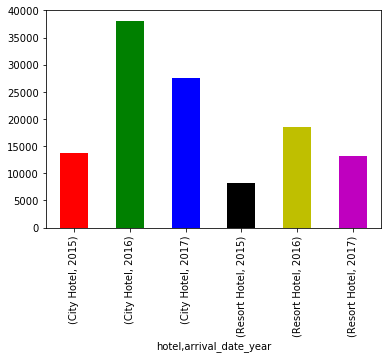

In [77]:
df_gorup_by_type_year.plot( kind='bar', color=list(my_colors))


let's do zoom on the specific months whose problemtic

In [81]:
df_gorup_by_type_year_month = df.groupby(["hotel","arrival_date_year","arrival_date_month"])["is_canceled"].count()
df_gorup_by_type_year_month

hotel         arrival_date_year  arrival_date_month
City Hotel    2015               August                2480
                                 December              1654
                                 July                  1398
                                 November              1235
                                 October               3386
                                 September             3529
              2016               April                 3561
                                 August                3378
                                 December              2478
                                 February              2371
                                 January               1364
                                 July                  3131
                                 June                  3923
                                 March                 3046
                                 May                   3676
                                 November       

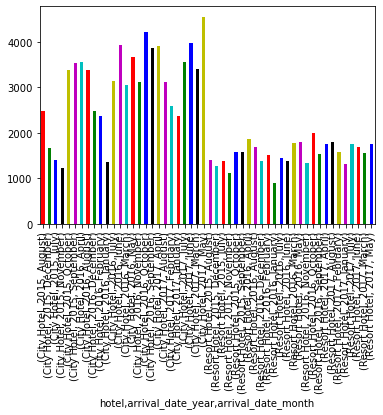

In [79]:
df_gorup_by_type_year_month.plot( kind='bar', color=list(my_colors))


In [86]:
more_than_3500 = df_gorup_by_type_year_month[df_gorup_by_type_year_month>3500]
more_than_3500

hotel       arrival_date_year  arrival_date_month
City Hotel  2015               September             3529
            2016               April                 3561
                               June                  3923
                               May                   3676
                               October               4219
                               September             3871
            2017               April                 3919
                               July                  3559
                               June                  3971
                               May                   4556
Name: is_canceled, dtype: int64

rule of thumb --> that more than 3500 cancel in a month it's too much for a hotel 

2016 October  4219

2017 May 4556

someone need to get fired



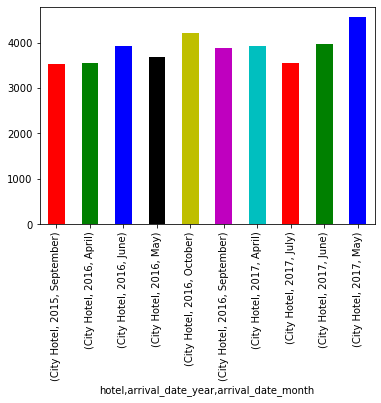

In [87]:
more_than_3500.plot( kind='bar', color=list(my_colors))


now we will search the postive side of staying

In [89]:
df_gorup_by_type_year_repated_guest = df.groupby(["hotel","arrival_date_year"])["is_repeated_guest"].count()
df_gorup_by_type_year_repated_guest

hotel         arrival_date_year
City Hotel    2015                 13682
              2016                 38140
              2017                 27508
Resort Hotel  2015                  8314
              2016                 18567
              2017                 13179
Name: is_repeated_guest, dtype: int64

# good sign
repeated guest is in that amount at 2016 in City Hotel is really postive sign

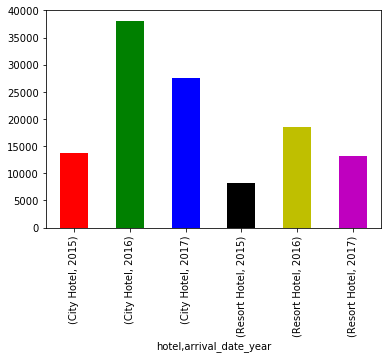

In [90]:
df_gorup_by_type_year_repated_guest.plot( kind='bar', color=list(my_colors))


In [93]:
df_gorup_by_type_year_type_customer_repated_guest = df.groupby(["hotel","arrival_date_year","customer_type"])["stays_in_weekend_nights"].count()
df_gorup_by_type_year_type_customer_repated_guest

hotel         arrival_date_year  customer_type  
City Hotel    2015               Contract            2087
                                 Group                142
                                 Transient           5304
                                 Transient-Party     6149
              2016               Contract             180
                                 Group                 62
                                 Transient          30298
                                 Transient-Party     7600
              2017               Contract              33
                                 Group                 89
                                 Transient          23802
                                 Transient-Party     3584
Resort Hotel  2015               Contract             571
                                 Group                 50
                                 Transient           6127
                                 Transient-Party     1566
              2016     

In [96]:
df_gorup =df_gorup_by_type_year_type_customer_repated_guest[df_gorup_by_type_year_type_customer_repated_guest>3500]
df_gorup 

hotel         arrival_date_year  customer_type  
City Hotel    2015               Transient           5304
                                 Transient-Party     6149
              2016               Transient          30298
                                 Transient-Party     7600
              2017               Transient          23802
                                 Transient-Party     3584
Resort Hotel  2015               Transient           6127
              2016               Transient          14093
                                 Transient-Party     3793
              2017               Transient           9989
Name: stays_in_weekend_nights, dtype: int64

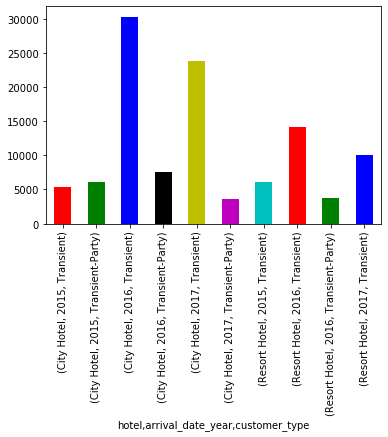

In [97]:
df_gorup.plot( kind='bar', color=list(my_colors))


the biggest customer is the regular people